<div class="alert alert-block alert-danger">
    <h2>확률 변수로서의 모델 파라미터</h2>
</div>

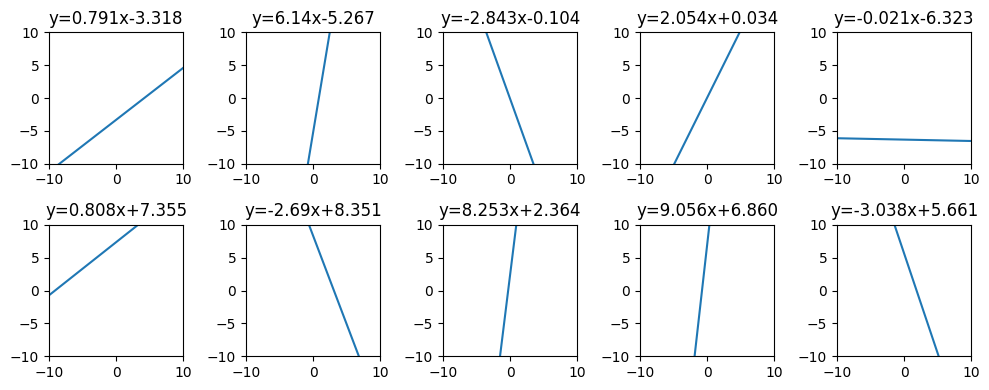

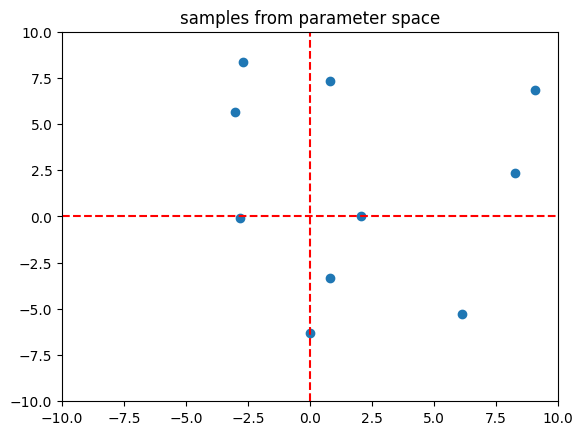

In [1]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()
axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.plot()
plt.vlines([0], -10, 10, linestyles='dashed', colors='red')
plt.hlines([0], -10, 10, linestyles='dashed', colors='red')
plt.show()

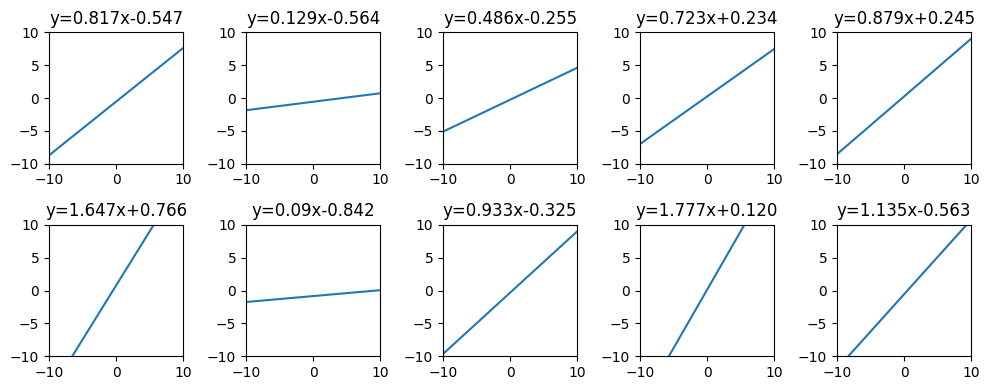

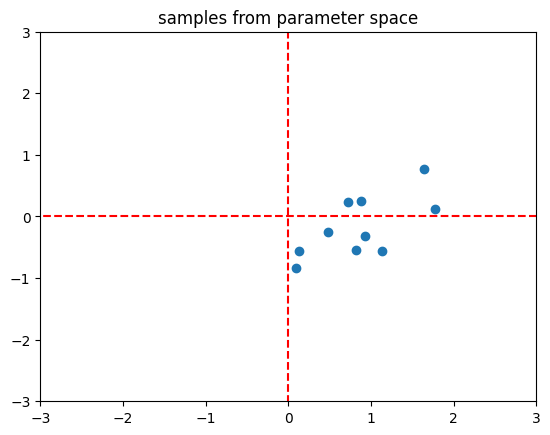

In [2]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-3, 3)
axes2.set_ylim(-3, 3)

plt.scatter(px, py)
plt.vlines([0], -10, 10, linestyles='dashed', colors='red')
plt.hlines([0], -10, 10, linestyles='dashed', colors='red')
plt.show()

<div class="alert alert-block alert-danger">
    <h2>사전 확률, 가능도, 사후 확률(prior, likelihood, posterior)</h2>
</div>

 
* $p(θ)$ prior(prior probability, 사전 확률) : 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포
* $p(X=x∣θ)$ , $L(θ∣x)$ likelihood(가능도, 우도) : prior 분포를 고정시킬때, 주어진 파라미터 분포에 대해서 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산
* 최대 가능도 추정(maximum likelihood estimation, MLE) : likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법
* posterior(posterior probability, 사후 확률) : 데이터를 관찰한 후 계산되는 확률
* 최대 사후 확률 추정(maximum a posteriori estimation, MAP) : posterior를 최대화하는 방향으로 모델을 학습시키는 방법
|posterior와 prior, likelihood 사이의 관계|
|--|
|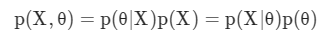|
|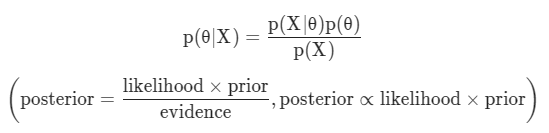|

<div class="alert alert-block alert-danger">
    <h2>Likelihood</h2>
</div>

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
input_data = np.linspace(-2, 2, 50)
input_data

array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])

In [5]:
noise = np.random.normal(0,1, size=50)
noise

array([-1.09645237,  0.82492265,  0.24694739, -1.52060033,  0.0404604 ,
        0.58598984,  0.27490013,  0.46006328, -1.22638423,  1.03456859,
        0.4732852 ,  0.86271273,  1.41002654,  0.4114437 , -0.57217871,
        0.26493228,  0.20153677, -0.19191495, -0.04233409, -0.79661102,
       -1.91811069, -1.99491581,  0.89824614,  1.9930055 ,  1.79414188,
        1.19014132,  0.5570771 , -1.61557206,  0.11424256,  2.89208888,
        0.56996293, -0.84323928,  0.72003769, -0.05892617,  0.01327443,
       -0.46704505, -0.08363269,  0.72121925,  0.50087399, -0.52997659,
       -0.12128219, -0.75063185, -1.30562735, -0.12565327, -0.01197038,
       -1.01568419,  1.1305711 ,  0.86308907, -0.81669898,  0.02619805])

In [6]:
label = input_data + 1 + noise
label

array([-2.09645237, -0.0934447 , -0.5897873 , -2.27570237, -0.63300899,
       -0.0058469 , -0.23530396,  0.03149185, -1.573323  ,  0.76926247,
        0.28961173,  0.76067191,  1.38961838,  0.47266819, -0.42932157,
        0.48942208,  0.50765922,  0.19584016,  0.42705367, -0.24559061,
       -1.28545763, -1.28063009,  1.6941645 ,  2.87055652,  2.75332556,
        2.23095765,  1.67952608, -0.41149043,  1.39995685,  4.25943581,
        2.01894252,  0.68737296,  2.33228259,  1.63495138,  1.78878464,
        1.39009781,  1.85514282,  2.74162742,  2.60291481,  1.65369688,
        2.14402393,  1.59630693,  1.12294408,  2.38455081,  2.57986636,
        1.6577852 ,  3.88567314,  3.69982377,  2.10166837,  3.02619805])

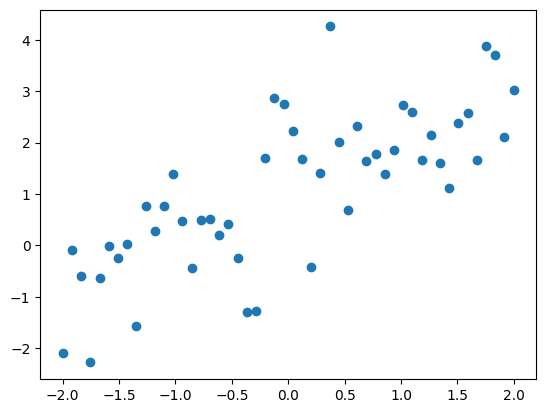

In [7]:
plt.scatter(input_data, label)
plt.show()

In [8]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 0.5326
b = 0.0113
#-------------------------------#

In [9]:
# 모델 예측값
model_output = a*input_data + b

|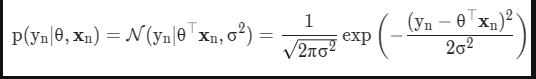|
|--|

In [10]:
# 계산의 편의성을 위해 표준편차(sigma)는 0.1로 가정
sigma = 0.1

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
likelihood = []
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*sigma*sigma))*math.exp(-pow(y-output,2)/(2*sigma*sigma))) # likelihood 값

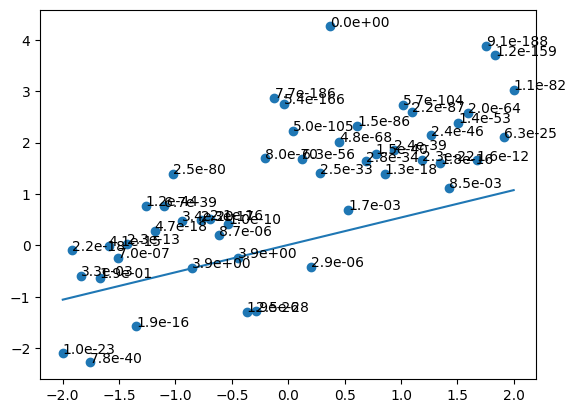

In [11]:
model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate(f'{text:.1e}', (input_data[i], label[i]))

plt.show()

<div class="alert alert-block alert-danger">
    <h2>최대 가능도 추론(maximum likelihood estimation, MLE)</h2>
</div>

* Likelihood

|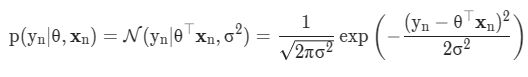|
|--|

* 데이터 전체의 Likelihood

|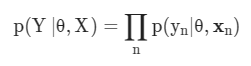|
|--|

데이터 전체의 Likelihood는 각 likelihood의 값을 곱하여 구하게됩니다.

이때 실제로는 log likelihood를 값으로 곱하게 되는데 log이기 때문에 덧셈 계산을 할 수 있기 때문입니다.

따라서 Likelihood 의 최대화는
|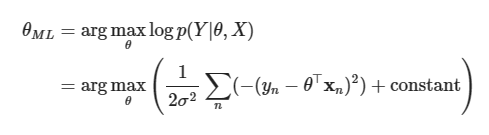|
|--|

하지만 손실함수의 최소화의 관점에서 negative log likelihood의 최소 제곱법으로 찾게됩니다.
|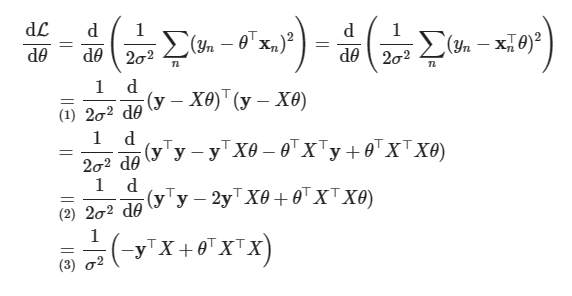|
|--|

결론적으로 최적화 파라미터 $\theta_{ml}$ 은 다음과 같습니다.
|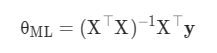|
|--|

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
[-1.12749781 -0.58972291 -0.97885561 -1.06656813 -0.66493421 -0.44550315
 -0.18284256 -1.86543224 -0.43393401  0.73597873 -0.27437989 -0.42502975
 -0.05756204 -0.9749111  -0.18615816 -0.19787772  0.41282392 -0.16469504
  1.29584358  0.86723276  0.22181186  1.2591329   0.37039599  0.8362706
  1.5728017   0.68432342  1.75997907  1.65818083  0.55498441  1.82501076
  2.41945348  0.62805124  1

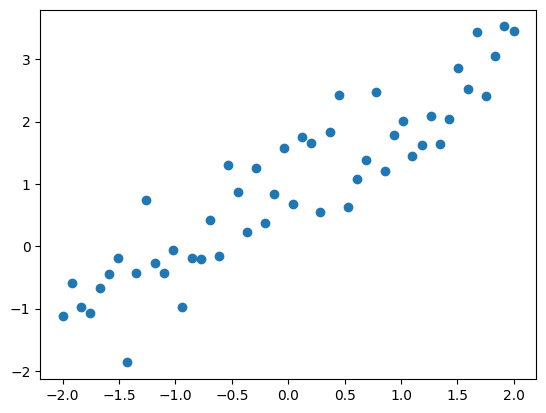

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

num_samples = 50

input_data = np.linspace(-2, 2, num_samples)
print(input_data)
noise = np.random.normal(0, 0.5, size=num_samples)
labels = input_data + 1 + noise
print(labels)

plt.scatter(input_data, labels)
plt.show()

In [13]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))
    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

In [14]:
# X: 50x2 matrix, y: 50x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
X[:10]

array([[-2.        ,  1.        ],
       [-1.91836735,  1.        ],
       [-1.83673469,  1.        ],
       [-1.75510204,  1.        ],
       [-1.67346939,  1.        ],
       [-1.59183673,  1.        ],
       [-1.51020408,  1.        ],
       [-1.42857143,  1.        ],
       [-1.34693878,  1.        ],
       [-1.26530612,  1.        ]])

In [15]:
y = labels
y[:10]

array([-1.12749781, -0.58972291, -0.97885561, -1.06656813, -0.66493421,
       -0.44550315, -0.18284256, -1.86543224, -0.43393401,  0.73597873])

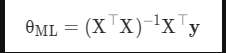

In [16]:
np.dot(X.T,X) # 

array([[ 6.93877551e+01, -5.32907052e-15],
       [-5.32907052e-15,  5.00000000e+01]])

In [17]:
np.linalg.inv(np.dot(X.T,X)) # 역행렬

array([[1.44117647e-02, 1.53602621e-18],
       [1.53602621e-18, 2.00000000e-02]])

In [18]:
np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)

array([[-0.02882353, -0.02764706, -0.02647059, -0.02529412, -0.02411765,
        -0.02294118, -0.02176471, -0.02058824, -0.01941176, -0.01823529,
        -0.01705882, -0.01588235, -0.01470588, -0.01352941, -0.01235294,
        -0.01117647, -0.01      , -0.00882353, -0.00764706, -0.00647059,
        -0.00529412, -0.00411765, -0.00294118, -0.00176471, -0.00058824,
         0.00058824,  0.00176471,  0.00294118,  0.00411765,  0.00529412,
         0.00647059,  0.00764706,  0.00882353,  0.01      ,  0.01117647,
         0.01235294,  0.01352941,  0.01470588,  0.01588235,  0.01705882,
         0.01823529,  0.01941176,  0.02058824,  0.02176471,  0.02294118,
         0.02411765,  0.02529412,  0.02647059,  0.02764706,  0.02882353],
       [ 0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.

In [19]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

array([1.03196333, 0.95005958])

slope: 1.0320 bias: 0.9501
likelihood: 1.3608e-280
negative log likelihood: 6.4442e+02


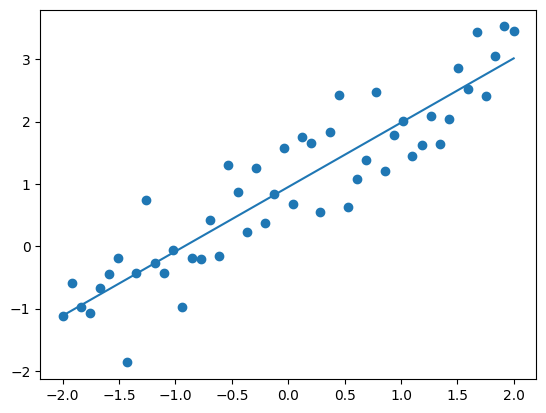

In [20]:
# model: y = ax + b
# 최적의 a, b
theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

<div class="alert alert-block alert-danger">
    <h2>최대 사후 확률 추정 (maximum a posteriori estimation, MAP)</h2>
</div>

* posterior는 $p(θ∣X,Y)$로 '이런 데이터가 있을 때 파라미터의 값이 무엇일 확률이 제일 높은가'를 뜻하며 likelihood $p(Y∣θ,X)$에 관한 식으로 표현하면
|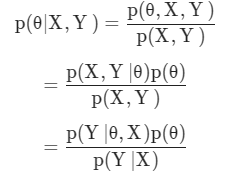|
|--|

* $p(θ)$ 는 
|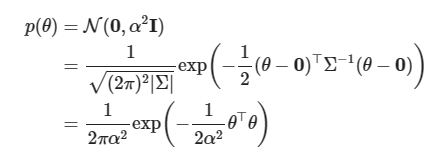|
|--|

* negative log posterior
|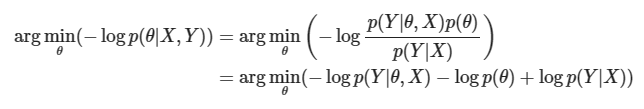|
|--|

* Minimize posterior $P(θ)$

|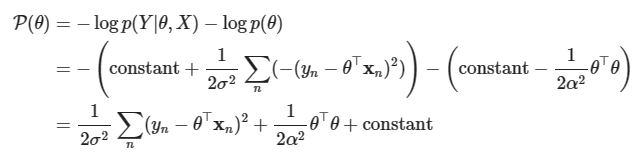|
|--|
|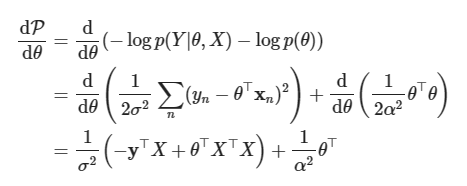|
|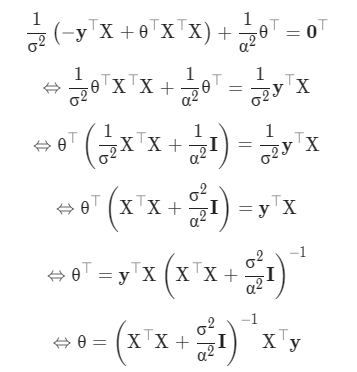|
|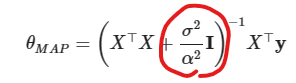|



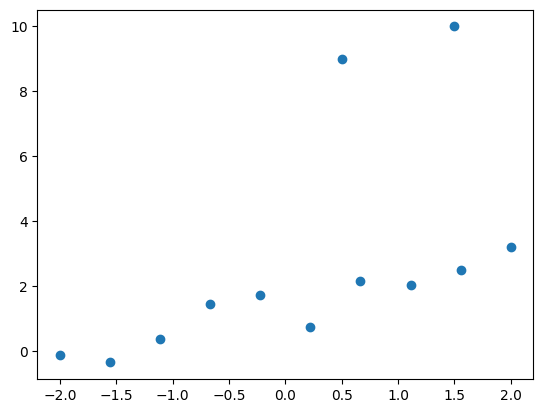

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

In [22]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


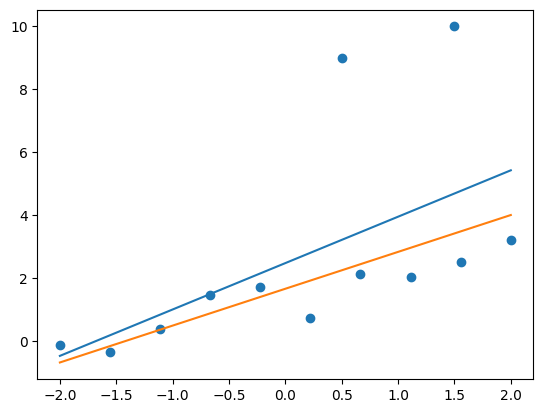

In [23]:
# 노이즈 분포의 표준편차 σ는 0.1로 가정
# 파라미터 분포의 표준편차 α는 0.04로 가정
# 정규화 상수 λ 값이 클수록 모델의 유연성은 감소하죠.
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()